In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

# Defining learning parameters

In [2]:
# learning parameters
batch_size = 512
epochs = 100
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Prepare training dataset

In [3]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

# Generator

In [4]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Discriminator

In [5]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [6]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1

# Tools for training

In [7]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)
# optim_d = optim.SGD(discriminator.parameters(), lr=0.0002)

In [8]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [9]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [10]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)

In [11]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [12]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [13]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

# Q.Write training loop

118it [00:15,  7.73it/s]                         


Epoch 1 of 100
Generator loss: 1.38046473, Discriminator loss: 0.88983092


118it [00:15,  7.55it/s]                         


Epoch 2 of 100
Generator loss: 2.79107935, Discriminator loss: 1.27611552


118it [00:15,  7.83it/s]                         


Epoch 3 of 100
Generator loss: 3.91404873, Discriminator loss: 0.68674248


118it [00:14,  7.90it/s]                         


Epoch 4 of 100
Generator loss: 3.99730930, Discriminator loss: 0.66509902


118it [00:15,  7.77it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


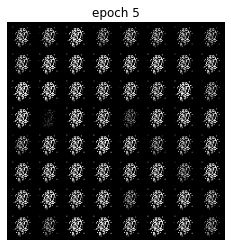

Epoch 5 of 100
Generator loss: 4.16092760, Discriminator loss: 0.57170911


118it [00:14,  7.90it/s]                         


Epoch 6 of 100
Generator loss: 4.80301267, Discriminator loss: 0.51661239


118it [00:14,  7.89it/s]                         


Epoch 7 of 100
Generator loss: 2.94673633, Discriminator loss: 1.23410034


118it [00:15,  7.86it/s]                         


Epoch 8 of 100
Generator loss: 2.90667502, Discriminator loss: 0.70839391


118it [00:15,  7.80it/s]                         


Epoch 9 of 100
Generator loss: 2.23006229, Discriminator loss: 0.97771070


118it [00:14,  7.88it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


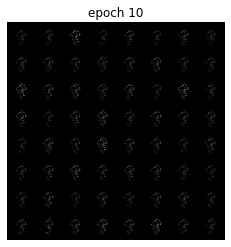

Epoch 10 of 100
Generator loss: 1.20403248, Discriminator loss: 1.13294676


118it [00:15,  7.86it/s]                         


Epoch 11 of 100
Generator loss: 2.00117150, Discriminator loss: 1.01231310


118it [00:15,  7.86it/s]                         


Epoch 12 of 100
Generator loss: 1.67754905, Discriminator loss: 0.96229090


118it [00:15,  7.82it/s]                         


Epoch 13 of 100
Generator loss: 2.06963000, Discriminator loss: 0.86336214


118it [00:15,  7.67it/s]                         


Epoch 14 of 100
Generator loss: 2.44434095, Discriminator loss: 1.24959861


118it [00:15,  7.84it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


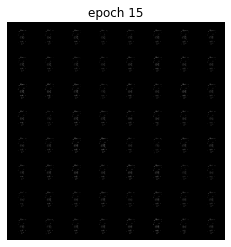

Epoch 15 of 100
Generator loss: 1.87418703, Discriminator loss: 1.08778759


118it [00:15,  7.82it/s]                         


Epoch 16 of 100
Generator loss: 1.08692178, Discriminator loss: 1.37645099


118it [00:15,  7.85it/s]                         


Epoch 17 of 100
Generator loss: 1.29128113, Discriminator loss: 0.87704891


118it [00:15,  7.84it/s]                         


Epoch 18 of 100
Generator loss: 1.76154530, Discriminator loss: 0.77916121


118it [00:15,  7.64it/s]                         


Epoch 19 of 100
Generator loss: 2.31163379, Discriminator loss: 0.54840375


118it [00:15,  7.75it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


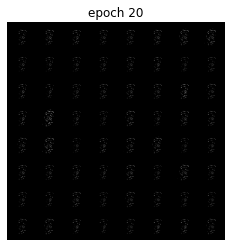

Epoch 20 of 100
Generator loss: 2.59851927, Discriminator loss: 0.42466501


118it [00:15,  7.77it/s]                         


Epoch 21 of 100
Generator loss: 3.05881622, Discriminator loss: 0.37507259


118it [00:15,  7.77it/s]                         


Epoch 22 of 100
Generator loss: 2.99470826, Discriminator loss: 0.44872586


118it [00:15,  7.79it/s]                         


Epoch 23 of 100
Generator loss: 2.71763725, Discriminator loss: 0.53209079


118it [00:15,  7.70it/s]                         


Epoch 24 of 100
Generator loss: 3.20608989, Discriminator loss: 0.38634809


118it [00:15,  7.70it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


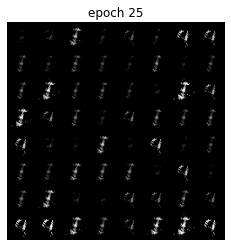

Epoch 25 of 100
Generator loss: 3.30591002, Discriminator loss: 0.40870735


118it [00:15,  7.79it/s]                         


Epoch 26 of 100
Generator loss: 3.09400690, Discriminator loss: 0.32969257


118it [00:15,  7.75it/s]                         


Epoch 27 of 100
Generator loss: 2.82309906, Discriminator loss: 0.46010238


118it [00:15,  7.76it/s]                         


Epoch 28 of 100
Generator loss: 3.02498938, Discriminator loss: 0.44953996


118it [00:15,  7.77it/s]                         


Epoch 29 of 100
Generator loss: 2.96710360, Discriminator loss: 0.43454341


118it [00:15,  7.66it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


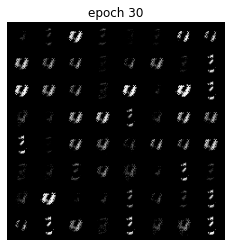

Epoch 30 of 100
Generator loss: 3.14118991, Discriminator loss: 0.48641710


118it [00:15,  7.75it/s]                         


Epoch 31 of 100
Generator loss: 2.63930892, Discriminator loss: 0.56321495


118it [00:15,  7.78it/s]                         


Epoch 32 of 100
Generator loss: 2.77039946, Discriminator loss: 0.46856737


118it [00:15,  7.78it/s]                         


Epoch 33 of 100
Generator loss: 2.86595737, Discriminator loss: 0.47956731


118it [00:15,  7.78it/s]                         


Epoch 34 of 100
Generator loss: 2.71956734, Discriminator loss: 0.57309152


118it [00:15,  7.67it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


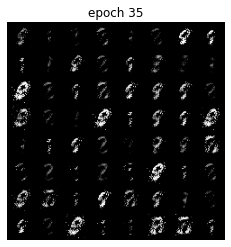

Epoch 35 of 100
Generator loss: 2.59081102, Discriminator loss: 0.53739194


118it [00:15,  7.76it/s]                         


Epoch 36 of 100
Generator loss: 2.39412261, Discriminator loss: 0.71829372


118it [00:15,  7.77it/s]                         


Epoch 37 of 100
Generator loss: 2.27038466, Discriminator loss: 0.60117437


118it [00:15,  7.75it/s]                         


Epoch 38 of 100
Generator loss: 2.54261135, Discriminator loss: 0.61896065


118it [00:15,  7.77it/s]                         


Epoch 39 of 100
Generator loss: 2.25199227, Discriminator loss: 0.63059224


118it [00:15,  7.73it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


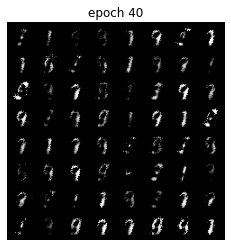

Epoch 40 of 100
Generator loss: 2.24217131, Discriminator loss: 0.63359317


118it [00:15,  7.69it/s]                         


Epoch 41 of 100
Generator loss: 2.37842882, Discriminator loss: 0.59138521


118it [00:15,  7.74it/s]                         


Epoch 42 of 100
Generator loss: 2.31478975, Discriminator loss: 0.72412725


118it [00:15,  7.76it/s]                         


Epoch 43 of 100
Generator loss: 2.20806646, Discriminator loss: 0.65156360


118it [00:15,  7.76it/s]                         


Epoch 44 of 100
Generator loss: 2.33769792, Discriminator loss: 0.66613072


118it [00:15,  7.72it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


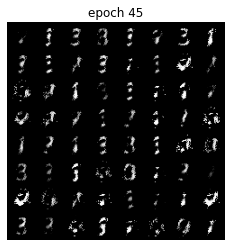

Epoch 45 of 100
Generator loss: 2.17051151, Discriminator loss: 0.77200278


118it [00:15,  7.67it/s]                         


Epoch 46 of 100
Generator loss: 2.18372587, Discriminator loss: 0.74666711


118it [00:15,  7.75it/s]                         


Epoch 47 of 100
Generator loss: 2.04310560, Discriminator loss: 0.74730058


118it [00:15,  7.76it/s]                         


Epoch 48 of 100
Generator loss: 2.20977457, Discriminator loss: 0.78010812


118it [00:15,  7.76it/s]                         


Epoch 49 of 100
Generator loss: 1.96424318, Discriminator loss: 0.79448452


118it [00:15,  7.72it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


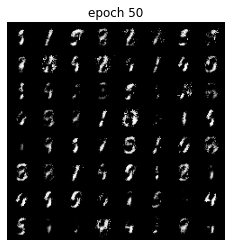

Epoch 50 of 100
Generator loss: 1.95294846, Discriminator loss: 0.78374667


118it [00:15,  7.75it/s]                         


Epoch 51 of 100
Generator loss: 2.19352751, Discriminator loss: 0.67475835


118it [00:15,  7.71it/s]                         


Epoch 52 of 100
Generator loss: 2.22884445, Discriminator loss: 0.68122533


118it [00:15,  7.73it/s]                         


Epoch 53 of 100
Generator loss: 2.10686019, Discriminator loss: 0.67997737


118it [00:15,  7.75it/s]                         


Epoch 54 of 100
Generator loss: 2.00868704, Discriminator loss: 0.74598955


118it [00:15,  7.75it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


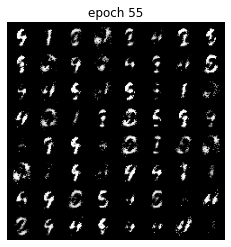

Epoch 55 of 100
Generator loss: 2.04331652, Discriminator loss: 0.70398032


118it [00:15,  7.63it/s]                         


Epoch 56 of 100
Generator loss: 2.27878597, Discriminator loss: 0.69903132


118it [00:15,  7.71it/s]                         


Epoch 57 of 100
Generator loss: 2.04160303, Discriminator loss: 0.71289069


118it [00:15,  7.75it/s]                         


Epoch 58 of 100
Generator loss: 2.03286216, Discriminator loss: 0.81929486


118it [00:15,  7.75it/s]                         


Epoch 59 of 100
Generator loss: 1.72943027, Discriminator loss: 0.81480415


118it [00:15,  7.75it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


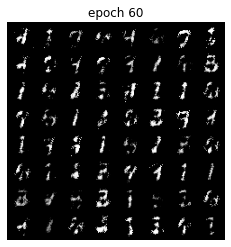

Epoch 60 of 100
Generator loss: 1.92937420, Discriminator loss: 0.72976114


118it [00:15,  7.71it/s]                         


Epoch 61 of 100
Generator loss: 2.00019838, Discriminator loss: 0.75876121


118it [00:15,  7.70it/s]                         


Epoch 62 of 100
Generator loss: 1.66524701, Discriminator loss: 0.90307331


118it [00:15,  7.75it/s]                         


Epoch 63 of 100
Generator loss: 1.88697661, Discriminator loss: 0.78345734


118it [00:15,  7.73it/s]                         


Epoch 64 of 100
Generator loss: 1.90914750, Discriminator loss: 0.85523885


118it [00:15,  7.75it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


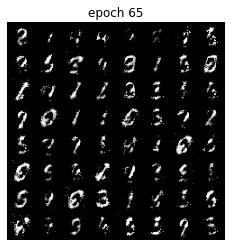

Epoch 65 of 100
Generator loss: 1.85032580, Discriminator loss: 0.80580617


118it [00:15,  7.68it/s]                         


Epoch 66 of 100
Generator loss: 1.96557408, Discriminator loss: 0.77292104


118it [00:15,  7.69it/s]                         


Epoch 67 of 100
Generator loss: 2.01728670, Discriminator loss: 0.76682045


118it [00:15,  7.73it/s]                         


Epoch 68 of 100
Generator loss: 1.75179762, Discriminator loss: 0.86187296


118it [00:15,  7.74it/s]                         


Epoch 69 of 100
Generator loss: 1.78930006, Discriminator loss: 0.80336423


118it [00:15,  7.75it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


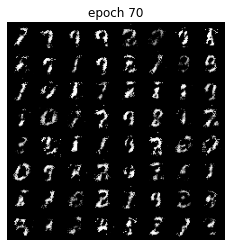

Epoch 70 of 100
Generator loss: 2.01450756, Discriminator loss: 0.79439589


118it [00:15,  7.69it/s]                         


Epoch 71 of 100
Generator loss: 1.85488796, Discriminator loss: 0.79750421


118it [00:15,  7.73it/s]                         


Epoch 72 of 100
Generator loss: 1.95038562, Discriminator loss: 0.80188173


118it [00:15,  7.71it/s]                         


Epoch 73 of 100
Generator loss: 2.04256463, Discriminator loss: 0.78969487


118it [00:15,  7.75it/s]                         


Epoch 74 of 100
Generator loss: 1.82366631, Discriminator loss: 0.81184703


118it [00:15,  7.75it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


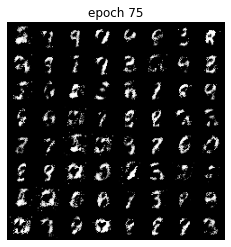

Epoch 75 of 100
Generator loss: 1.82171619, Discriminator loss: 0.84652981


118it [00:15,  7.73it/s]                         


Epoch 76 of 100
Generator loss: 1.68559545, Discriminator loss: 0.89688290


118it [00:15,  7.72it/s]                         


Epoch 77 of 100
Generator loss: 1.57921956, Discriminator loss: 0.99730413


118it [00:15,  7.75it/s]                         


Epoch 78 of 100
Generator loss: 1.47087750, Discriminator loss: 0.98995731


118it [00:15,  7.70it/s]                         


Epoch 79 of 100
Generator loss: 1.63582623, Discriminator loss: 0.90414764


118it [00:15,  7.75it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


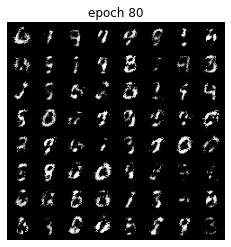

Epoch 80 of 100
Generator loss: 1.75749705, Discriminator loss: 0.89383012


118it [00:15,  7.61it/s]                         


Epoch 81 of 100
Generator loss: 1.66205760, Discriminator loss: 0.90699454


118it [00:15,  7.70it/s]                         


Epoch 82 of 100
Generator loss: 1.67522754, Discriminator loss: 0.90535652


118it [00:15,  7.69it/s]                         


Epoch 83 of 100
Generator loss: 1.67742479, Discriminator loss: 0.88169016


118it [00:15,  7.72it/s]                         


Epoch 84 of 100
Generator loss: 1.67170659, Discriminator loss: 0.91347858


118it [00:15,  7.71it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


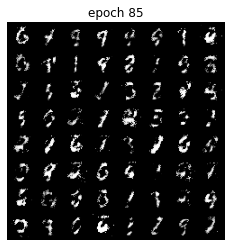

Epoch 85 of 100
Generator loss: 1.66673014, Discriminator loss: 0.87539230


118it [00:15,  7.71it/s]                         


Epoch 86 of 100
Generator loss: 1.76992550, Discriminator loss: 0.94101917


118it [00:15,  7.62it/s]                         


Epoch 87 of 100
Generator loss: 1.69099040, Discriminator loss: 0.88809508


118it [00:15,  7.71it/s]                         


Epoch 88 of 100
Generator loss: 1.79621378, Discriminator loss: 0.81246328


118it [00:15,  7.71it/s]                         


Epoch 89 of 100
Generator loss: 1.78431324, Discriminator loss: 0.87620020


118it [00:15,  7.69it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


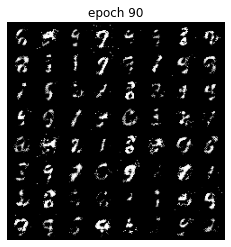

Epoch 90 of 100
Generator loss: 1.72999475, Discriminator loss: 0.88676100


118it [00:15,  7.72it/s]                         


Epoch 91 of 100
Generator loss: 1.57992494, Discriminator loss: 0.90831303


118it [00:15,  7.72it/s]                         


Epoch 92 of 100
Generator loss: 1.65636873, Discriminator loss: 0.88308563


118it [00:15,  7.72it/s]                         


Epoch 93 of 100
Generator loss: 1.66788196, Discriminator loss: 0.86306331


118it [00:15,  7.70it/s]                         


Epoch 94 of 100
Generator loss: 1.73576682, Discriminator loss: 0.84056411


118it [00:15,  7.71it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


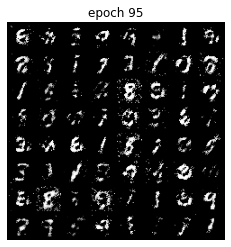

Epoch 95 of 100
Generator loss: 1.72822718, Discriminator loss: 0.84732752


118it [00:15,  7.66it/s]                         


Epoch 96 of 100
Generator loss: 1.73071237, Discriminator loss: 0.88139207


118it [00:15,  7.70it/s]                         


Epoch 97 of 100
Generator loss: 1.54856306, Discriminator loss: 0.91861457


118it [00:15,  7.69it/s]                         


Epoch 98 of 100
Generator loss: 1.53713558, Discriminator loss: 0.97142810


118it [00:15,  7.71it/s]                         


Epoch 99 of 100
Generator loss: 1.60574671, Discriminator loss: 0.95502433


118it [00:15,  7.72it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


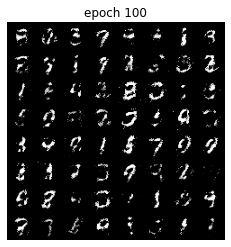

Epoch 100 of 100
Generator loss: 1.60894739, Discriminator loss: 0.91240467


In [14]:
torch.manual_seed(7777)

def generator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    
    optim_g.zero_grad()
    batch =  output.shape[0]
    
    z = create_noise(batch, 128)
    label_z = label_real(batch)
#     label_z = label_fake(batch) # TODO for qb
    
    x_fake = generator(z)
    out_z = discriminator(x_fake)
    loss_z = criterion(out_z, label_z)

    G_loss = loss_z
    G_loss.backward()
    optim_g.step()

    return  G_loss.data.item()
    
    ######################################
    
def discriminator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    optim_d.zero_grad()
    batch =  output.shape[0]
    
    label_x = label_real(batch)
    
    out_x = discriminator(output)
    loss_x = criterion(out_x, label_x)

    z = create_noise(batch, 128)
    label_z = label_fake(batch)
    
    x_fake = generator(z)
    out_z = discriminator(x_fake)
    loss_z = criterion(out_z, label_z)

    D_loss = loss_x + loss_z

    D_loss.backward()
    optim_d.step()

    return  D_loss.data.item()
    
    
    ######################################
    

for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        ############ YOUR CODE HERE ########## 
#         optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)
        for _ in range(k):
            data_ = data[0][torch.randperm(data[0].size()[0])]
            data_ = data_[:sample_size, :, :, :]
#             discriminator_loss(data_, None)
            loss_d += discriminator_loss(data_, None)
        loss_g += generator_loss(data_, None)

    
        ######################################
    
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch + 1) % 5 == 0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")        

In [15]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs/generator_2k.pth')

DONE TRAINING


In [16]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs/generator_images_2k.gif', imgs)

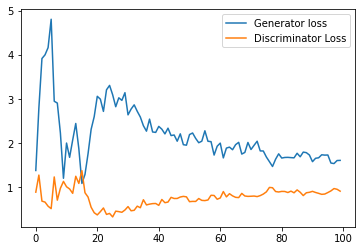

In [17]:
# plot and save the generator and discriminator loss
plt.figure()
plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.savefig('outputs/loss_2k.png')